# Final Project: License Plate Reader


Manual license plate reading is prone to errors, especially when there are multiple vehicles, or the plates are dirty, obstructed or damaged. Automated license plate reading (ALPR) using computer vision can improve accuracy, speed up the process, and reduce human error. By using methodologies that we used in class such as image processing/transformation applications and feature matching, we should be able to have our code correctly identify the edges and boundaries of each character to successfully read a license plate.

In order to achieve this, we will be going through the following process:
- Be able to identify the placement of the license plate.
- Identify each character on the license plate.
- Classify each character and add up to get the full number.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Identifying the License Plate

In order to find the license plate, we first preprocess the image to improve the accuracy of license plate detection and character segmentation, which we achieve through resizing, smoothing, thresholding, and edge detection.

Afterwards, we use computer vision strategies to locate the license plate in the image. 
In our case we make use of contour detection to identify the contour bounding box that contains our license plate.

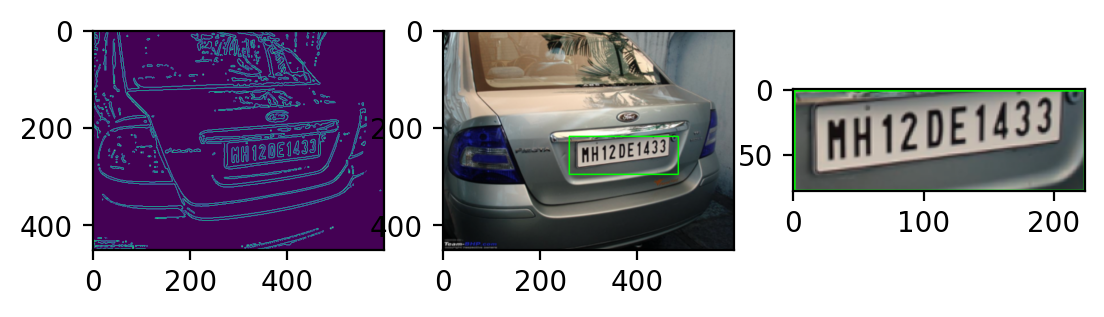

In [26]:
# Import necessary libraries
import cv2

# Load the image of the license plate using OpenCV
img = cv2.imread('Cars248.png')

# Resize the image to a fixed width while maintaining the aspect ratio
img_width = 600
aspect_ratio = img.shape[1] / img.shape[0]
img_height = int(img_width / aspect_ratio)
img = cv2.resize(img, (img_width, img_height))

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and smooth the image
kernel_size = (5, 5)
blur = cv2.GaussianBlur(gray, kernel_size, 0)

# Apply adaptive thresholding to separate the foreground (license plate) from the background
max_value = 255
block_size = 19
constant = 9
th = cv2.adaptiveThreshold(blur, max_value, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, block_size, constant)

# Apply edge detection to highlight the edges of the license plate
canny = cv2.Canny(th, 30, 150)

# Display the image with the license plate region highlighted
cv2.imshow('License Plate Detection', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Find contours in the image
contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_area = 10000
max_area = 15000

# Iterate over each contour to find the license plate
for contour in contours:
    # Get the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    
    # Check if the aspect ratio of the bounding rectangle is within a certain range to filter out non-license plate regions
    min_aspect_ratio = 3
    max_aspect_ratio = 4
    if aspect_ratio >= min_aspect_ratio and aspect_ratio <= max_aspect_ratio and w*h >= min_area and w*h <= max_area :
        # Draw a rectangle around the license plate region
        x -= 10
        y -= 10
        w += 20
        h += 20
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
       
        # Crop the license plate region from the image using the bounding rectangle coordinates
        plate = img[y:y+h, x:x+w]

# Display the cropped license plate image
cv2.imshow('License Plate', plate)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Display the image with the license plate region highlighted
cv2.imshow('License Plate Detection', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(canny)
plt.subplot(1, 3, 2)
plt.imshow(img)
plt.subplot(1, 3, 3)
plt.imshow(plate)


## Performing Character Segmentation

Once we have located the license plate region, we can now try to read the characters in the license plate. 
There are two ways to do this, we can either attempt this manually, using similar techniques as in the previous section such as thresholding, contour detection, and bounding box extraction.

Or we can use an optical object recognition package such as pytesseract or easyocr.


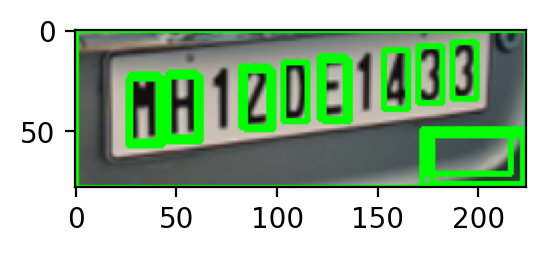

In [28]:
# Convert the license plate region to grayscale
plate_gray = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding to binarize the image
thresh = cv2.adaptiveThreshold(plate_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define a function to sort contours from left to right
def sort_contours(contours):
    # Get the bounding box coordinates for each contour
    bounding_boxes = [cv2.boundingRect(c) for c in contours]
    
    # Sort the bounding boxes from left to right based on their x-coordinates
    contours_sorted = [c for _, c in sorted(zip(bounding_boxes, contours), key=lambda b: b[0])]
    
    return contours_sorted

# Sort the contours from left to right
contours = sort_contours(contours)

# Define the minimum and maximum width and height of a character in the license plate
min_char_width = 10
max_char_width = 150
min_char_height = 20
max_char_height = 150

# Iterate over each contour to perform character segmentation
for contour in contours:
    # Get the bounding box coordinates for the contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Check if the bounding box is within the minimum and maximum width and height of a character in the license plate
    if w >= min_char_width and w <= max_char_width and h >= min_char_height and h <= max_char_height:
        # Draw a rectangle around the character
        cv2.rectangle(plate, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
# Display the image with the character segments highlighted
cv2.imshow('Character Segmentation', plate)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(dpi=200)
plt.subplot(121)
plt.imshow(plate)